### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [32]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [34]:
def classify_gpa(gpa):
    if gpa <= 2:
        return 'Low'
    elif gpa <= 3.5:
        return 'Medium'
    else:
        return 'High'

data['Profile'] = data['GPA'].apply(classify_gpa)

print(data.head())

data.to_csv("Student_performance_with_profile.csv", index=False)

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass Profile  
0             0  2.929196         2.0  Medium  
1 

### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

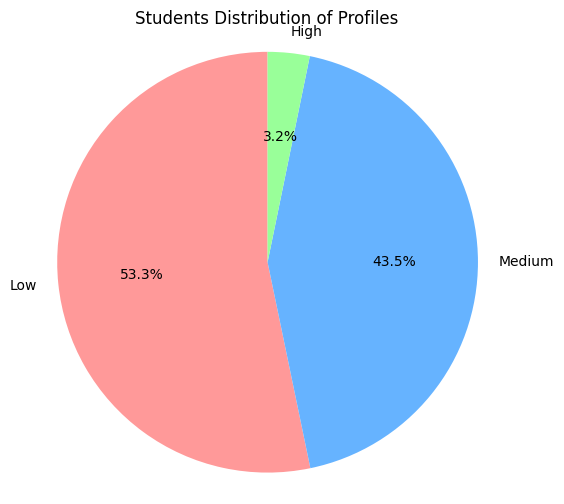

In [35]:
profile_counts = data['Profile'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Students Distribution of Profiles')
plt.axis('equal') 
plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [36]:
data['Profile_encoded'] = data['Profile'].map({'High': 2, 'Medium': 1, 'Low': 0})

data[['Profile', 'Profile_encoded']].head()


,Profile,Profile_encoded
0,Medium,1
1,Medium,1
2,Low,0
3,Medium,1
4,Low,0


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [37]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Profile', 'Profile_encoded', 'StudentID'])
y = data['Profile_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1913, 14), (479, 14), (1913,), (479,))

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5], X_test_scaled[:5]


(array([[ 1.37285117,  0.97165101, -0.84616672,  2.26211643,  1.46815853,
          1.10591545,  1.51976596, -1.9146563 ,  1.27724773,  1.51039849,
         -0.49705784, -0.43041146, -0.55096019,  0.82018081],
        [-0.40585814,  0.97165101,  2.06170801,  0.23853507, -1.27677348,
          0.51650879, -0.65799605, -1.02021491, -0.78293347, -0.66207693,
         -0.49705784,  2.3233582 , -1.25109413,  0.82018081],
        [ 0.48349652, -1.0291761 ,  1.09241643,  1.25032575, -1.10363153,
          1.22379678, -0.65799605, -1.9146563 , -0.78293347, -0.66207693,
         -0.49705784, -0.43041146, -1.92618913,  0.82018081],
        [ 0.48349652,  0.97165101, -0.84616672, -0.77325561,  1.06811657,
          1.22379678,  1.51976596, -0.12577352, -0.78293347, -0.66207693,
         -0.49705784, -0.43041146, -0.79551824,  0.82018081],
        [-0.40585814, -1.0291761 , -0.84616672, -1.78504629, -1.52652437,
          0.51650879,  1.51976596, -0.12577352, -0.78293347, -0.66207693,
          2.

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [39]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()


model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                960       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3,139
Trainable params: 3,139
Non-trainable params: 0
_________________________________________________________________


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

print("El modelo se compiló con éxito.")


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                960       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3,139
Trainable params: 3,139
Non-trainable params: 0
_________________________________________________________________
El modelo se compiló con éxito.


### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [42]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=10, 
                    validation_split=0.2)
print("Entrenamiento completado y guardado en la variable 'history'.")

Epoch 1/50
153/153 [==============================] - 3s 4ms/step - loss: 0.4760 - accuracy: 0.8621 - val_loss: 0.2586 - val_accuracy: 0.9269
Epoch 2/50
153/153 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9444 - val_loss: 0.1708 - val_accuracy: 0.9399
Epoch 3/50
153/153 [==============================] - 0s 3ms/step - loss: 0.1331 - accuracy: 0.9608 - val_loss: 0.1239 - val_accuracy: 0.9608
Epoch 4/50
153/153 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9699 - val_loss: 0.1094 - val_accuracy: 0.9582
Epoch 5/50
153/153 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9804 - val_loss: 0.0938 - val_accuracy: 0.9713
Epoch 6/50
153/153 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9830 - val_loss: 0.0824 - val_accuracy: 0.9687
Epoch 7/50
153/153 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9889 - val_loss: 0.0762 - val_accuracy: 0.9713
Epoch 

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

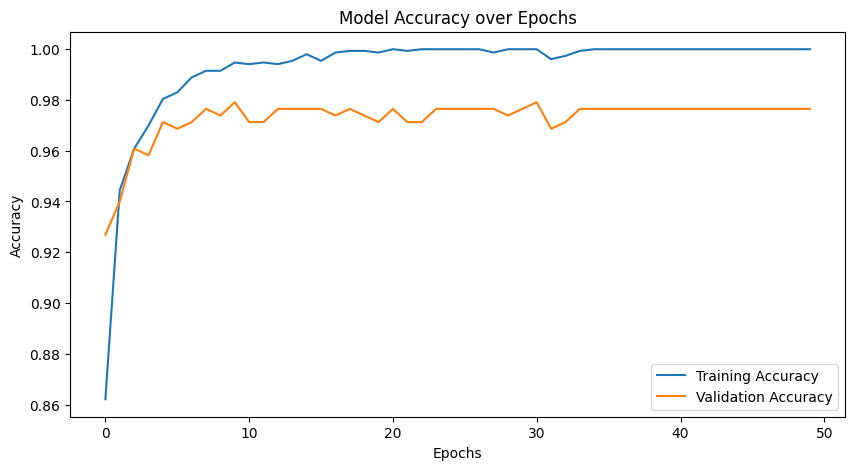

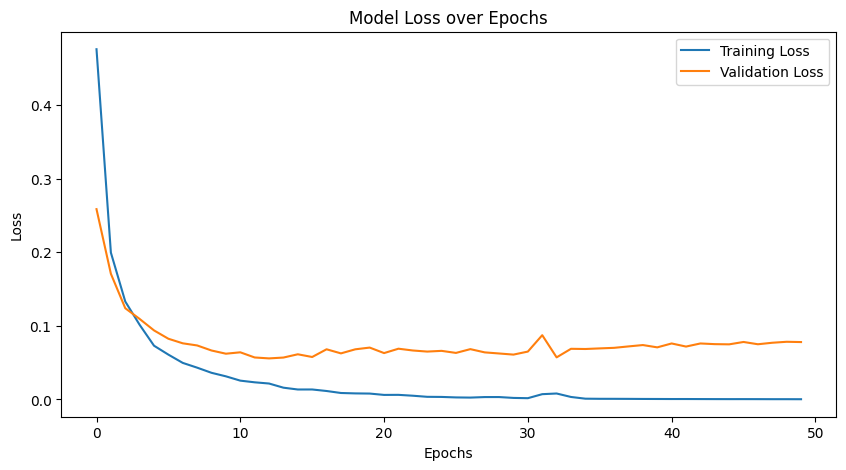

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


En la grafica de accuracy vemos que el modelo predice  correctamente las etiquetas en el conjunto de entrenamiento.(linea azul).
Y la precisión se estabiliza en aproximadamente 98% lo cual es muy bueno (linea naranja)

Y en el grafico de loss la pérdida de entrenamiento disminuye rápidamente y se acerca a 0 (línea azul) 
La pérdida de validación también disminuye a un valor muy bajo y se estabiliza después de algunas épocas. (línea naranja)

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [44]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


15/15 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9749
Test Loss: 0.11959845572710037
Test Accuracy: 0.9749478101730347


en Test Loss teniendo 0.1296 o sea un valor bajo de pérdida, nos muestra que el modelo está prediciendo con una buena precisión en los datos de prueba, lo cual es un buen signo de generalización.

Y en Test Accuracy teniendo 0.97703  nos indica que el modelo logra predecir correctamente las etiquetas en el 97.7% de los casos en los datos de prueba, lo cual es muy buen resultado. 

Con los resultados que obtuvimos en el modelo  entrenado deducimos que este está funcionando muy bien en los datos de prueba, con una alta precisión y baja pérdida, lo cual  indica que ha aprendido correctamente los patrones en los datos de entrenamiento y está generalizando bien. Esto nos muestra que es un modelo confiable para predecir nuevas instancias dentro de este dominio.

### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [45]:
predictions = model.predict(X_test_scaled)
predicted_classes = predictions.argmax(axis=1)
label_map = {0: 'Low', 1: 'Medium', 2: 'High'}

for i in range(10): 
    actual_class = label_map[y_test.iloc[i]]
    predicted_class = label_map[predicted_classes[i]]
    print(f"Predicted: {predicted_class}, Actual: {actual_class}")
accuracy = (predicted_classes == y_test.values).mean()
print(f"Prediction Accuracy: {accuracy}")


15/15 [==============================] - 0s 2ms/step
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Prediction Accuracy: 0.9749478079331941


El modelo  que se generó es muy bueno en la clasificación de los perfiles de los estudiantes, se logró una alta precisión tanto en los datos de entrenamiento como en los de prueba. Este rendimiento muestra que el modelo es confiable y generaliza bien, es decir obtuvimos muy buenos resultados.

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [46]:
print(X.columns)

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler

X_model2 = X.drop(columns=['Ethnicity'])

scaler = StandardScaler()
X_train_model2_scaled = scaler.fit_transform(X_train)
X_test_model2_scaled = scaler.transform(X_test)


model2 = Sequential()
model2.add(Dense(128, input_dim=X_train_model2_scaled.shape[1], activation='relu'))
model2.add(Dropout(0.3)) 
model2.add(Dense(64, activation='relu'))
model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer=RMSprop(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

history2 = model2.fit(X_train_model2_scaled, y_train, 
                      epochs=70, 
                      batch_size=10, 
                      validation_split=0.2)

test_loss2, test_accuracy2 = model2.evaluate(X_test_model2_scaled, y_test)

print(f"Test Loss Model 2: {test_loss2}")
print(f"Test Accuracy Model 2: {test_accuracy2}")


Epoch 1/70
153/153 [==============================] - 1s 5ms/step - loss: 0.3698 - accuracy: 0.8869 - val_loss: 0.1916 - val_accuracy: 0.9452
Epoch 2/70
153/153 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9471 - val_loss: 0.1364 - val_accuracy: 0.9478
Epoch 3/70
153/153 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.9542 - val_loss: 0.1093 - val_accuracy: 0.9504
Epoch 4/70
153/153 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 0.9588 - val_loss: 0.0841 - val_accuracy: 0.9582
Epoch 5/70
153/153 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9699 - val_loss: 0.0774 - val_accuracy: 0.9739
Epoch 6/70
153/153 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9725 - val_loss: 0.0723 - val_accuracy: 0.9791
Epoch 7/70
153/153 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9693 - val_loss: 0.0655 - val_accuracy: 0.9765
Epoch 

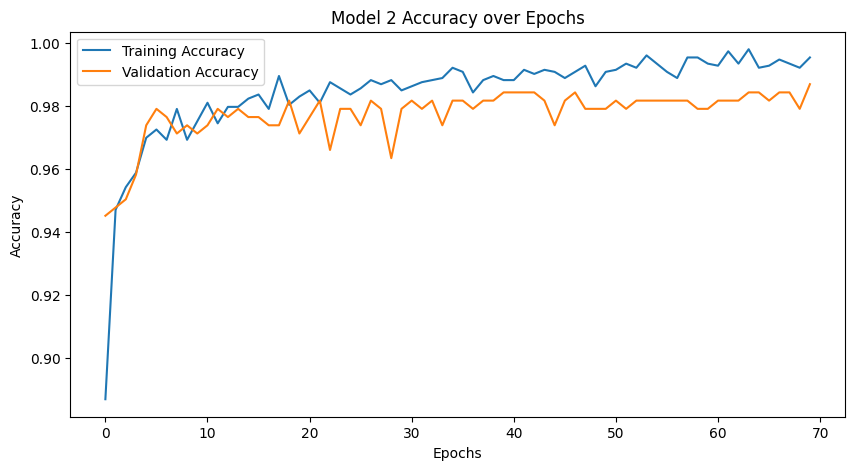

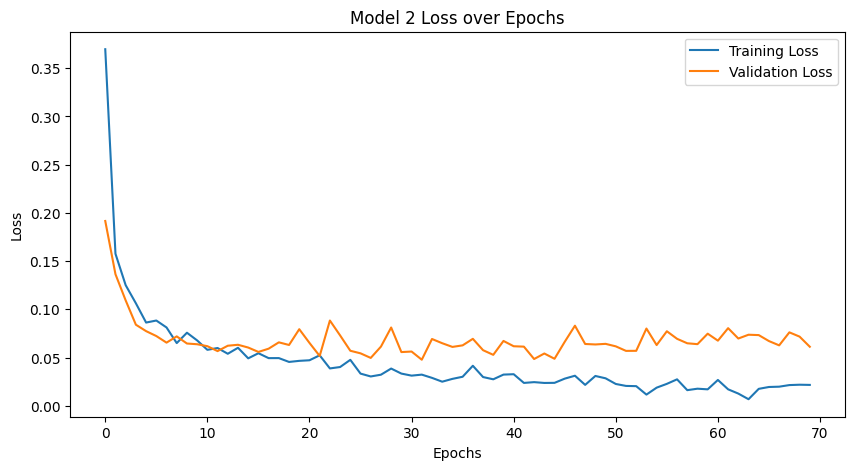

In [48]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [49]:
test_loss2, test_accuracy2 = model2.evaluate(X_test_model2_scaled, y_test)

print(f'Test Loss (Model 2): {test_loss2}')
print(f'Test Accuracy (Model 2): {test_accuracy2}')

15/15 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9812
Test Loss (Model 2): 0.09248360246419907
Test Accuracy (Model 2): 0.9812108278274536


In [50]:
predictions_model2 = model2.predict(X_test_model2_scaled)
predicted_classes_model2 = predictions_model2.argmax(axis=1)

label_map = {0: 'Low', 1: 'Medium', 2: 'High'}

for i in range(10): 
    actual_class = label_map[y_test.iloc[i]]
    predicted_class = label_map[predicted_classes_model2[i]]
    print(f"Predicted: {predicted_class}, Actual: {actual_class}")

accuracy_model2 = (predicted_classes_model2 == y_test.values).mean()
print(f"Prediction Accuracy (Model 2): {accuracy_model2}")


15/15 [==============================] - 0s 2ms/step
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Prediction Accuracy (Model 2): 0.9812108559498957


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adagrad
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_model3_scaled = scaler.fit_transform(X_train)
X_test_model3_scaled = scaler.transform(X_test)

model3 = Sequential()
model3.add(Dense(64, input_dim=X_train_model3_scaled.shape[1], activation='relu'))
model3.add(Dropout(0.4))  
model3.add(Dense(32, activation='relu'))
model3.add(Dense(3, activation='softmax'))

model3.compile(optimizer=Adagrad(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

history3 = model3.fit(X_train_model3_scaled, y_train, 
                      epochs=50, 
                      batch_size=20, 
                      validation_split=0.2)

test_loss3, test_accuracy3 = model3.evaluate(X_test_model3_scaled, y_test)

print(f"Test Loss Model 3: {test_loss3}")
print(f"Test Accuracy Model 3: {test_accuracy3}")


Epoch 1/50
77/77 [==============================] - 1s 8ms/step - loss: 1.3078 - accuracy: 0.2111 - val_loss: 1.1525 - val_accuracy: 0.3734
Epoch 2/50
77/77 [==============================] - 0s 3ms/step - loss: 1.1312 - accuracy: 0.3431 - val_loss: 1.0442 - val_accuracy: 0.4830
Epoch 3/50
77/77 [==============================] - 0s 5ms/step - loss: 1.0549 - accuracy: 0.4444 - val_loss: 0.9715 - val_accuracy: 0.5875
Epoch 4/50
77/77 [==============================] - 0s 3ms/step - loss: 0.9885 - accuracy: 0.5359 - val_loss: 0.9166 - val_accuracy: 0.6371
Epoch 5/50
77/77 [==============================] - 0s 3ms/step - loss: 0.9256 - accuracy: 0.5869 - val_loss: 0.8730 - val_accuracy: 0.6736
Epoch 6/50
77/77 [==============================] - 0s 3ms/step - loss: 0.8918 - accuracy: 0.6229 - val_loss: 0.8358 - val_accuracy: 0.7076
Epoch 7/50
77/77 [==============================] - 0s 3ms/step - loss: 0.8536 - accuracy: 0.6542 - val_loss: 0.8031 - val_accuracy: 0.7363
Epoch 8/50
77/77 [==

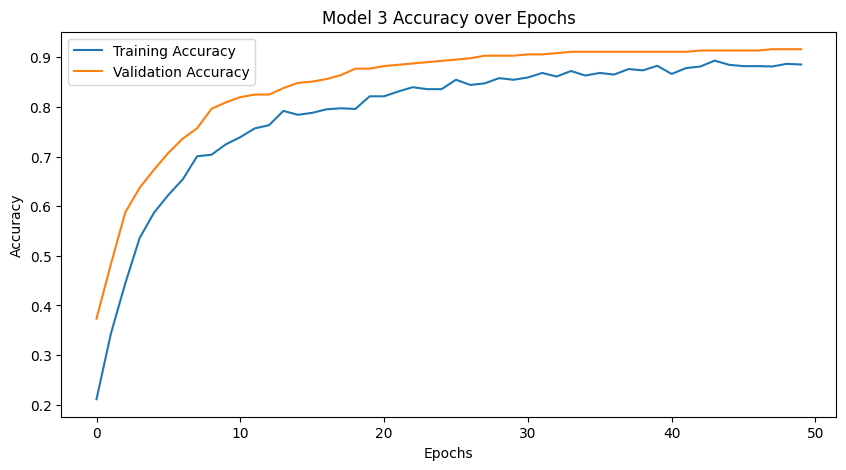

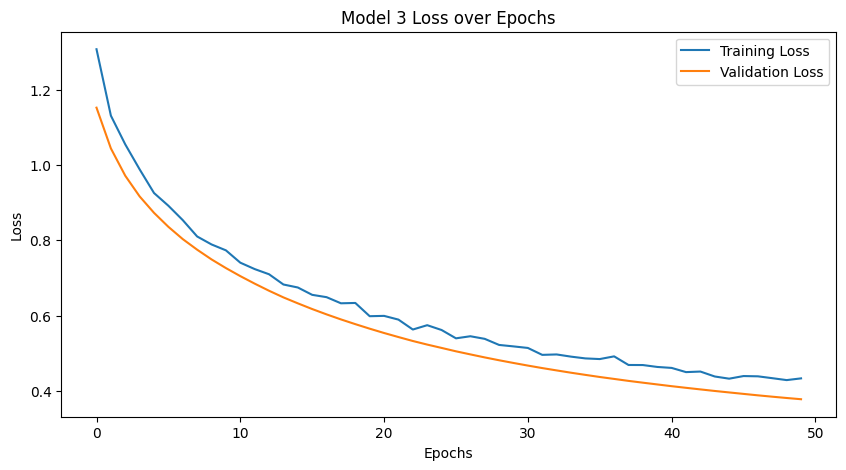

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3 Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [53]:
test_loss3, test_accuracy3 = model3.evaluate(X_test_model3_scaled, y_test)

print(f'Test Loss (Model 3): {test_loss3}')
print(f'Test Accuracy (Model 3): {test_accuracy3}')


15/15 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.9144
Test Loss (Model 3): 0.3931950330734253
Test Accuracy (Model 3): 0.9144049882888794


In [54]:
predictions_model3 = model3.predict(X_test_model3_scaled)

predicted_classes_model3 = predictions_model3.argmax(axis=1)

label_map = {0: 'Low', 1: 'Medium', 2: 'High'}

for i in range(10):  
    actual_class = label_map[y_test.iloc[i]]
    predicted_class = label_map[predicted_classes_model3[i]]
    print(f"Predicted: {predicted_class}, Actual: {actual_class}")

accuracy_model3 = (predicted_classes_model3 == y_test.values).mean()
print(f"Prediction Accuracy (Model 3): {accuracy_model3}")


15/15 [==============================] - 0s 2ms/step
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Medium
Predicted: Medium, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Prediction Accuracy (Model 3): 0.9144050104384134


In [55]:
import pandas as pd

results = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Test Loss': [test_loss, test_loss2, test_loss3],
    'Test Accuracy': [test_accuracy, test_accuracy2, test_accuracy3]
}

results_df = pd.DataFrame(results)
print("Resultados de los tres modelos:")
print(results_df)

selected_indices = [0, 1, 2, 3, 4]  

predictions_table = pd.DataFrame({
    'Actual': [label_map[y_test.iloc[i]] for i in selected_indices],
    'Model 1 Prediction': [label_map[predicted_classes[i]] for i in selected_indices],
    'Model 2 Prediction': [label_map[predicted_classes_model2[i]] for i in selected_indices],
    'Model 3 Prediction': [label_map[predicted_classes_model3[i]] for i in selected_indices]
})

print("\nPredicciones para 5 alumnos:")
print(predictions_table)


Resultados de los tres modelos:
     Model  Test Loss  Test Accuracy
0  Model 1   0.119598       0.974948
1  Model 2   0.092484       0.981211
2  Model 3   0.393195       0.914405

Predicciones para 5 alumnos:
   Actual Model 1 Prediction Model 2 Prediction Model 3 Prediction
0     Low                Low                Low                Low
1  Medium             Medium             Medium             Medium
2  Medium             Medium             Medium                Low
3    High               High               High             Medium
4     Low                Low                Low                Low


Las modificaciones para el modelo 2 fueron: eliminé la columna "Ethnicity", ya que no la consideré relevante. Se aumentaron las unidades de las capas a 128 y 64 neuronas y los epochs las puse en 70.

Y para el modelo 3 se quedaron todas las características y se escalaron de nuevo. La unidades de capas disminuyeron a 64 y 32 neuronas y quedó de 50 epochs, pero aumente el batch size a 20.

Al comparar y análisar los resultados obtenidos de los 3 modelos podemos concluir que el modelo 2 tiene el mejor rendimiento global, con una menor pérdida y una precisión ligeramente superior al Modelo 1, por tan solo 0.002 sin embargo es un improvement.

Y el modelo 3 presenta una mayor pérdida y menor precisión, lo que indica que no fue tan efectivo como los otros dos modelos.
